# Final Report
    Quinn Theobald, Class of '22
    INFO 1950
    Final Project

# What Are the Most Surprisingly Successful Colleges?
    An analytical venture into fame and the top universities of the world.

In [1]:
import pandas
import numpy
from matplotlib import pyplot
import re
from sklearn.linear_model import LinearRegression

> Quinn Theobald<br>
> Cornell University<br>
> Class of '22

**Project github repository:** https://github.coecis.cornell.edu/qjt3/data-project.

# Introduction

> You always see those rankings online, the ones that tell you what the top ten colleges of this year are. <br>
All the lists are similar but slightly different, and it is always unclear how they created their ranking. In<br>
this project I aim to rank the top colleges by a clear metric: who has had the most number of famous alumni.<br>
I wanted to see not only what this ranking would look like, but where it differs from those lists we see all the<br>
time. Is there a college that flies under the radar and yet it wildly successful?

> To do this, I downloaded data from wikipedia – every college attended by every person notable enough to <br>
make it onto the site. Unsurprisingly, many Ivies and other famous schools were on the list. Harvard was by <br>
far in the lead... but not every entry was so expected. Most significantly, the University of Michigan turned <br>
out to be one of the top five most successful colleges in the entire world.

# Data Description

In this project I use two datasets, wikipeople and tertiary_education. Wikipeople is a dataframe built by processing data from wikipedia, and tertiary_education was created by reorganizing the data in wikipeople. I will now explain the information in both of them. See the data preprocessing and data cleaning files on the github if you would like to know how exactly I created these dataframes. <br><br>
Of course, the highest number of alumni appearing in Wikipedia is an imperfect stand-in for fame and quality, but I do think it tells us something about the schools and their impressive-ness.<br><br>
See the github linked at the top and bottom of this notebook to find the datasets. They are labelled:
- wikipeople_cleaned.csv
- tertiary_education_filtered.csv

In [2]:
wikipeople = pandas.read_csv('wikipeople_cleaned.csv')
wikipeople.set_index('name',inplace=True)
wikipeople.head()

,birth_date,occupation,education
name,,,
Alain Connes,1947,NaN,"['École Normale Supérieure', 'Pierre and Marie..."
Aldous Huxley,1894,{{hlist|writer|philosopher}},['Eton College']
Arthur Schopenhauer,1788,NaN,[]
Albert Einstein,1879,NaN,"['ETH Zurich|Federal Polytechnic School', 'Zur..."
Alfred Korzybski,1879,NaN,['Warsaw University of Technology']


In [3]:
tertiary_education = pandas.read_csv('tertiary_education_filtered.csv')
tertiary_education.set_index('school',inplace=True)
tertiary_education.head()

,count,notable_students
school,,
École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
Pierre and Marie Curie University,48,"['Alain Connes', 'Ahmad Motamedi', 'Pierre-Lou..."
Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
ETH Zurich|Federal Polytechnic School,1,['Albert Einstein']
Zurich,15,"['Albert Einstein', 'Claus Westermann', 'Annem..."


In [4]:
# pandas misinterprets the arrays in notable_students as strings, so here we quickly rectify that
def string_to_array(thing):
    # if it is already an array, return
    if isinstance(thing, list):
        return thing
    # else turn it into an array
    array = []
    while len(thing) > 2:
        temp = ' '
        r = re.search('\'([^,]*)\'', thing)
        if r:
            temp = r.group(1)
            array.append(temp)
        else:
            return array
        thing = thing[len(temp)+4:]
    return array

In [5]:
tertiary_education['notable_students'] = [ string_to_array(alumnus) for alumnus in tertiary_education['notable_students'] ]

#### What are the observations (rows) and attributes (columns)?

In the wikipeople dataset, the observations represent famous or semi-famous `people`. The attributes are: their `name`, their `birth date`, their `occupation`, and what `college` they went to.

In the tertiary_education dataset, the observations represent `schools`. The attributes are: `count` of famous people that attended the school, and an `array` of those famous people.

#### Why was this dataset created?

These datasets in their current forms were created by me to examine what colleges the most number of famous people attended.<br>
But the full wikipedia database was created as an open-source information platform.<br>
According to the wikipedia page on wikipedia, wikipedia was created to be a publicly accessible and publicly 
editable encyclopedia.

#### Who funded the creation of the dataset?

Wikipedia was originally funded by the CEOs of Bomis, but now is run by the non-profit organization `wikimedia`.

#### What processes might have influenced what data was observed and recorded and what was not?

Since `wikipedia` is an open-edit platform, any data in the public eye will be recorded.
Only information known to the general public (or enough of the public that a wiki editor knows it) will go on a person's wikipedia page. <br>
We should be aware that there is a selection bias in Wikipedia's data. People that are more 'popular' are likely to show up. Maybe personality types are also related to whether someone gets a page on wikipedia.

#### What preprocessing was done, and how did the data come to be in the form that you are using?

For a full explaination of everything I did for the wikipeople dataframe, see my data preprocessing ipynb.<br>
First, I downloaded a recent wikipedia dump from `wikimedia` downloads.<br>
Next, I iterated over the entire 17 GB file to extract all pages that had `'education'` or `'alma mater'` fields.<br>
Next, I iterated over the new peoples file (3GB) to store information about each person in a pandas DataFrame.<br>
Then I did a little bit of data cleaning so that the data in the dataframe was not nonsense strings.<br>
I extracted `birth years`, `schools`, and `names`.

For the tertiary_education dataframe, I simply reorganized the data in the wikipeople table. <br>
For every `school` found in every wikipedia education field, I added an entry. <br>
Then I iterated over every person and added 1 to the `count` of each school that person attended. <br>
Finally, I removed some entries that slipped in because of the messiness of wikipedia data: Bachelor of Arts, for instance, had been given an observation as a college.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?¶

I don't think people were actively aware of the data collection, but I think most people would assume that if
they are famous they have a wikipedia page.
<br>
Of course, people born/dead before the creation of wikipedia have no idea that information about their private lives is on display on the internet.
<br>
The data in wikipedia is supposed to be for informing the populace of common-knowledge facts. In this case, 
the common-knowledge facts are known information about renown people.

#### Where can your raw source data be found, if applicable?

See the link below! <br>
https://dumps.wikimedia.org/backup-index.html<br>
https://dumps.wikimedia.org/enwiki/20200420/enwiki-20200420-pages-articles-multistream.xml.bz2

# Data Analysis

## Part I: Colleges by Count
    In which I make a histogram plotting the top colleges by the number of people on wikipedia
    that attended that institution.

Let's look at just the schools that have 100 or more hits. There are a ton of random things written into the dataset because Wikipedia data is so disorganized – if we were to look at all schools we would get a bunch of random stuff and wouldn't be able to see the interesting data. By only looking at schools with at least 100 notable alumni we are ensuring we are looking at actual schools.

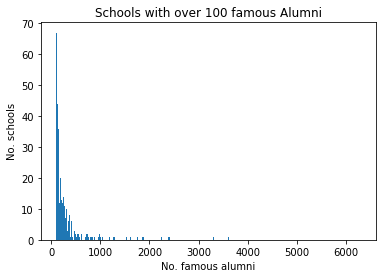

In [6]:
top_schools = tertiary_education[tertiary_education['count'] > 100]
pyplot.hist(top_schools['count'], bins=536)
pyplot.title('Schools with over 100 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

It looks like there are quite a lot of schools with 100 famous students, but a very long tail of schools with thousands of famous students. Why don't we break up top_schools by < 2000 students and > 2000 students to see what those histograms would look like.

In [7]:
top_schools_lower = top_schools[top_schools['count'] < 2000]
top_schools_upper = top_schools[top_schools['count'] > 2000]

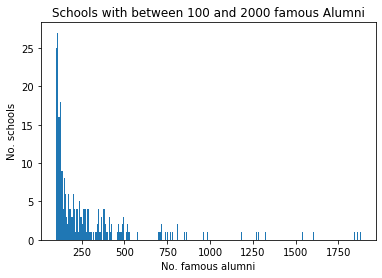

In [8]:
pyplot.hist(top_schools_lower['count'],bins=524)
pyplot.title('Schools with between 100 and 2000 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

We see here a long tail with this slice of schools. This makes sense: as the counts of famous alumni goes up, there are less and less schools with that many hits.

I wonder where Cornell University lies on this graph...

In [9]:
top_schools.loc[top_schools.index == 'Cornell University']['count'].values[0]

1759

Cornell University is at the very tail end of this histogram.

Now for the schools with more than 2000 famous alumni:

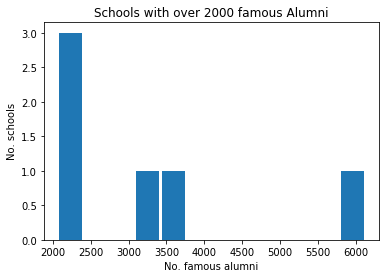

In [10]:
pyplot.hist(top_schools_upper['count'],bins=12, align='left', rwidth=0.9)
pyplot.title('Schools with over 2000 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

The bins in this histogram are much wider, but we can see how there are some (5) schools with famous alumni counts in the 2000s to 4000s range. There is one school all the way out above 5500 notable alumni, far more successful than the other schools. I wonder what school that is.

In [11]:
top_schools_highest = top_schools_upper[top_schools_upper['count'] > 5000]
top_schools_highest.index[0]

'Harvard University'

Ah. Of course it is.

## Part II: Top Ten Successful Colleges
    In which I examine the top ten colleges and compare to other online rankings.

First I would like to review top ten college lists from different sites. I constructed a master ranking list out of three online lists to compare with what will be our top ten list. I go into more detail on the creation of this aggregate top college list in the `Data Analysis` notebook.

First, I found three top ten rankings from popular on line sources: usnews, forbes, and the times. (see links to their rankings below.

In [12]:
usnews = ['Princeton', 'Harvard', 'Columbia', 'MIT', 'Yale', 'Stanford', 'UChicago', 'UPenn', 'Northwestern', 'Duke']
forbes = ['Harvard','Stanford','Yale','MIT','Princeton','UPenn','Brown','CalTech','Duke','Dartmouth']
times = ['Harvard','MIT','Yale','Columbia','CalTech','Stanford','Brown','Duke','Princeton','UPenn']

Let's construct a master ranking list out of these three to compare with our list.

In [13]:
ranking = {'Princeton':0, 'Harvard':0, 'Columbia':0, 'MIT':0, 'Yale':0, 'Stanford':0, 'UChicago':0, 'UPenn':0, 'Northwestern':0, 'Duke':0, 'Brown':0, 'CalTech':0, 'Dartmouth':0}
# I add points to each school for each ranking that rated it and how highly it rated it
# Being first place in a list is worth 10 points, while being last place is only worth 1
for i in range(10):
    ranking[usnews[i]] = ranking[usnews[i]] + 10 - i
    ranking[forbes[i]] = ranking[forbes[i]] + 10 - i
    ranking[times[i]] = ranking[times[i]] + 10 - i
# Now I turn this ranked dictionary into an ordered array
aggregate_ranking = []
temp = 'Harvard'
while len(aggregate_ranking) < 10:
    for key, value in ranking.items():
        if value > ranking[temp]:
            temp = key
    aggregate_ranking.append(temp)
    ranking[temp] = 0
aggregate_ranking

['Harvard',
 'MIT',
 'Yale',
 'Stanford',
 'Princeton',
 'Columbia',
 'UPenn',
 'CalTech',
 'Brown',
 'Duke']

Next we'll create our own model. As we've seen before, Harvard by far surpasses the other top schools in famous alumni. So the number 1 spot will at least be the same. Based on that, I think our list will be very similar to this aggregate ranking. But there may be one or two surprising differences.

In [14]:
top_ten = []
temp = ''
temp_count = 0
while len(top_ten) < 10:
    for school in top_schools.index:
        if (isinstance(school, float)):  # catching a 'nan' error
            school_count = 0
        else:
            school_count = top_schools['count'][school]
        if school in top_ten:
            continue
        elif school_count > temp_count:
            temp = school
            temp_count = school_count
    top_ten.append(temp)
    temp = ''
    temp_count = 0
top_ten

['Harvard University',
 'Yale University',
 'Columbia University',
 'Stanford University',
 'University of Michigan',
 'Princeton University',
 'University of Cambridge',
 'New York University',
 'University of Chicago',
 'Cornell University']

Let's compare.

In [15]:
aggregate_ranking

['Harvard',
 'MIT',
 'Yale',
 'Stanford',
 'Princeton',
 'Columbia',
 'UPenn',
 'CalTech',
 'Brown',
 'Duke']

The top four look very similar: `Harvard`, `Yale`, `Columbia`, `Stanford`. <br>
But there are some interesting differences. Let's take a closer look.

`University of Cambridge` shows up in our list, but not in the other. Why is this? <br>
This one is simple. `Cambridge` is a European university while the other universities are all American. The online lists do not classify international institutions, although it looks like perhaps that wouldn't make a world of difference in the rankings. That being said, `Cambridge` is simply one of the world's top colleges that happens to be in another country. 

`New York University` made its way onto our list. While not one of the top top colleges by other rankings, NYU is a very good school and clearly is better than many of the Ivies by our metric. This is a surprisingly successful school!

`Cornell University` snuck onto our list. In the other online rankings it usually lands at 11 or 12, but here it was just able to make it on. Yay!

`University of Michigan` is on our list. Now, this is a really interesting one. While considered a good school, `UMichigan` is usually not considered one of the top ten schools in the world. But it is number *5* on our list. UMichigan beats Princeton, Cambridge, and UChicago! This is one of the most successful colleges in the world!

Why is UMichigan so successful? Well it has one of the best theatre programs in the world, and there are more people from UMichigan on Broadway than perhaps any other school. Acting is perhaps the sector that comes with the most fame – and I suspect a disproportionately large portion of wikipeople are actors and actresses. This could also explain why NYU shows up on the most successful list. Regardless, if you want fame and a wikipedia page of your own, UMichigan might be the way to get there!

## Part III: Which of the Top Ten are getting more successful?
    In which I graph how successful each of the top ten colleges has been over the past seventy years.
    (counting cumulative notable alumni)

In [16]:
years = [1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]

Now let's make an array with success rates for all schools by year. We are going to graph how successful each college was at different points in their history.

In [17]:
i = 0
schools_success_by_years = []
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the conversion from string to array
                alumnus = 'Lupita Nyong\'o'
            elif wikipeople.loc[alumnus]['birth_date'] + 22 <= year: 
                # + 22 because there is an estimated 22 years between a notable alumni's birth and their college graduation
                count += 1
        temp_success.append(count)
    schools_success_by_years.append(temp_success)
    i += 1

A quick aside on the following data:<br><br>
We will be plotting, for each college, year versus success. Let me briefly explain exactly what the success metric is.<br>
The success metric is determined by the number of famous people attending that school that had graduated by that year. Graduation year is a rough estimation based on birth year + 22. Something to note is that at the time denoted, or at each given year, the school's number of successful people is less than our success metric. This is because people who just graduated were not famous yet and would not be famous for a while yet. But at that year, the success metric is the potential fame of all the alumni.<br><br>
One last note: in this project I have basically used fame and success interchangeably. These two metrics are related, but not exactly the same. Still, I think marginal fame is a good stand-in measure for success (keep in mind that the level of fame needed to get onto wikipedia is nowhere near the level of fame needed to be a celebrity).

In [18]:
colors = ['blue','green','red','cyan','magenta','black','teal','lime','orange','brown']

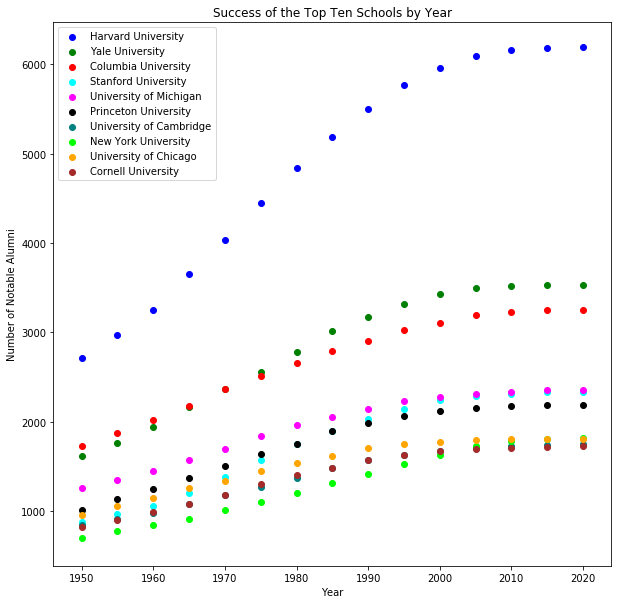

In [19]:
pyplot.figure(figsize=(10,10))
for i in range(10):
    pyplot.scatter(years, schools_success_by_years[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('Number of Notable Alumni')
pyplot.title('Success of the Top Ten Schools by Year')
pyplot.show()

All the schools seem to have a similar shaped curve over the last 70 years. Yale butted its way ahead of Columbia around 1970 and NYU made a quick rise around 2000, but overall all ten of the colleges seem to be growing at a similar pace. Interestingly, about the year 1990 it looks like the growth turned concave down rather than concave up.

I think it is worth noting that not only does Harvard have twice as many notable alumni as its next-in-line competitors Yale and Columbia, but the number of notable alumni Harvard had in *1950* is about equal to as many notable alumni Yale and Columbia have *now*. By this metric, Harvard is the best college far and away. It's not even in the same league as the other nine institutions.

But which of these schools has the steepest *rate of increase* in notable alumni? We can estimate this by making Linear Regressions of the ten top colleges and seeing which college's overall trend has the steepest slope.

## Part IV: Institutions' Increasing Rate of Success CUMULATIVE
    In which I measure schools' rate of increase with a linear regression modelling notable alumni versus year.

By eyeballing the graph, it looks to me like Harvard and Yale will have the steepest slopes. We shall see.

In [20]:
# This function will make a linear regression for a given school and return the slope of that regression.
def regression_coef(x, y):
    x = numpy.array(x).reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    return model.coef_[0]

In [21]:
for i in range(10):
    coef = regression_coef(years,schools_success_by_years[i])
    print(top_ten[i],': ',coef)

Harvard University :  54.95000000000001
Yale University :  30.270714285714284
Columbia University :  23.248571428571424
Stanford University :  23.49142857142857
University of Michigan :  16.955000000000002
Princeton University :  18.040714285714284
University of Cambridge :  14.285714285714286
New York University :  17.762857142857143
University of Chicago :  12.804285714285713
Cornell University :  13.97642857142857


Yes indeed, Harvard once again tops the list with a slope of 55. As we predicted, Yale is next. More or less, the rate of increase follows the ranking of top schools, with a couple of schools slightly ahead or behind of what their ranking would suggest.

But wait, this model has a slight drawback- if an old school has changed significantly in their notable alumni numbers, their old data is skewing what is happening with that school now. Maybe we need our model to follow a slightly different metric.

## Part V: Institutions' Increasing Rate of Success NON-CUMULATIVE
    In which I look at a slightly different interpretation of notable alumni per year and check see if there is a
    different increasing top college by this standard.

Now, instead of looking at the *cumulative* numbers of notable alumni, let's take a look at only the *new* notable alumni in each 5-year bracket. This should be a similar graph but there may be a little more variation.

In [22]:
# Now we create a data set of new notable alumni by year
i = 0
schools_success_per_year = []
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the converstion from string to array
                alumnus = 'Lupita Nyong\'o'
            graduation_date = wikipeople.loc[alumnus]['birth_date'] + 22
            if graduation_date <= year and graduation_date >= year - 5:
                count += 1
        temp_success.append(count)
    schools_success_per_year.append(temp_success)
    i += 1

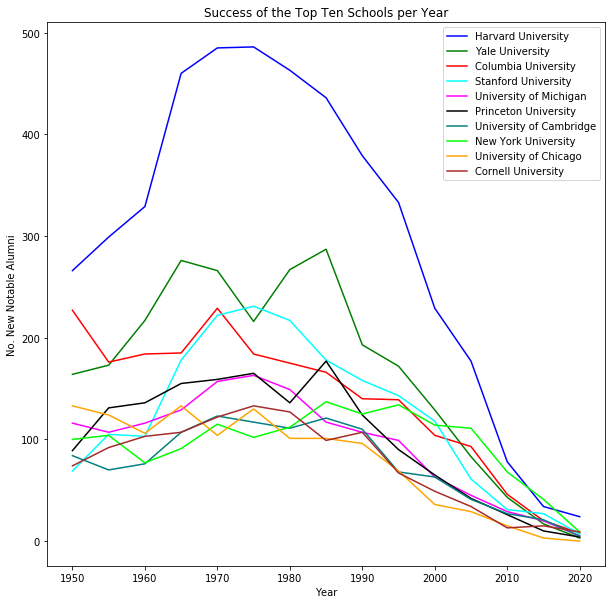

In [23]:
pyplot.figure(figsize=(10,10))
for i in range(10):
    pyplot.plot(years, schools_success_per_year[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('No. New Notable Alumni')
pyplot.title('Success of the Top Ten Schools per Year')
pyplot.show()

The shape of these curves makes sense. As we approach the current year, there are a lot of new graduates that are not yet famous: the points at 2020 are people that are famous already despite having just now graduated. My assumption was there was going to be a dip around the year 2000 because it would take 20 years or so for alumni to 'find their fame'. Looking at the data, it seems like the dip happens more around the year 1980. Is this turn in the graph only due to this *finding-fame* effect or is there something else at work? You would think people who graduated around 1980 would have become famous by now if they are going to. But there are still plenty of people who become famous around that age so maybe it is not so far-fetched.

Let's make the graph again and limit it to 1950-1980 to try and eliminate the effects of *finding-fame*.

In [24]:
schools_success_subset = []
i = 0
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years[:7]:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the converstion from string to array
                alumnus = 'Lupita Nyong\'o'
            graduation_date = wikipeople.loc[alumnus]['birth_date'] + 22
            if graduation_date <= year and graduation_date >= year - 5:
                count += 1
        temp_success.append(count)
    schools_success_subset.append(temp_success)
    i += 1

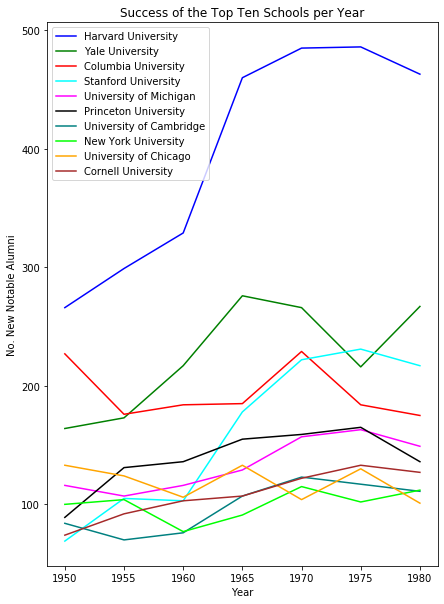

In [25]:
pyplot.figure(figsize=(7,10))
for i in range(10):
    pyplot.plot(years[:7], schools_success_subset[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('No. New Notable Alumni')
pyplot.title('Success of the Top Ten Schools per Year')
pyplot.show()

It seems that the number of notable alumni generally increases with years, but is this definitely the case? And how is each school increasing in relation to each other?

I will now measure schools' rate of increase with a linear regression modelling notable alumni versus year.

In [26]:
regression_slopes = []
for i in range(10):
    coef = regression_coef(years[:7],schools_success_subset[i])
    regression_slopes.append(coef)
    print(top_ten[i],': ',coef)

Harvard University :  8.007142857142856
Yale University :  3.1714285714285717
Columbia University :  -0.6785714285714288
Stanford University :  5.821428571428571
University of Michigan :  1.8000000000000003
Princeton University :  1.6571428571428575
University of Cambridge :  1.5857142857142856
New York University :  0.49999999999999994
University of Chicago :  -0.6142857142857143
Cornell University :  1.8571428571428572


According to this model, it looks like Harvard, Yale, and Stanford are increasing the most in notable alumni with UMichigan, Princeton, Cambridge, and Cornell coming up behind them. Columbia and UChicago are actually decreasing in their notable alumni output!

If this model is to be trusted, it seems to me that Columbia and UChicago might not be on this top-ten list forever.

This model might be a better one than taking total number of notable alumni. It certainly takes a closer look at how the colleges are doing closer to the present. But *how* good of a model is it?

# Evaluation of Significance

I now examine my new-notable-alumni-by-year model and determine whether it's results are reliable.

How likely is each school's correlation? Let's do some random permutations of number of notable alumni and see if the pattern in our graph is recognizable or just noise.

In [27]:
# let's start by looking at Harvard
def harvard_permuted_y():
    return numpy.random.permutation(schools_success_subset[0].copy())

In [28]:
harvard_permutations = []
harvard_permutation_slopes = []
for i in range(1000):
    fake_y = harvard_permuted_y()
    harvard_permutations.append(fake_y)
    numpy_years = numpy.array(years[:7]).reshape(-1,1)
    fake_model = LinearRegression().fit(numpy_years,fake_y)
    harvard_permutation_slopes.append(fake_model.coef_[0])

Let's make a histogram of 1000 randomly permuted slopes given the harvard data.

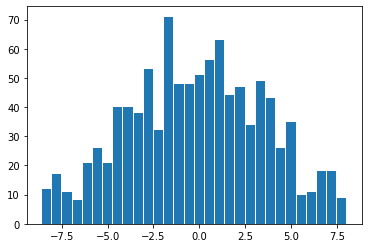

In [29]:
pyplot.hist(harvard_permutation_slopes, bins=30, align='left', rwidth=0.9)
pyplot.show()

In [30]:
print ("The actual slope for Harvard is ",regression_slopes[0])

The actual slope for Harvard is  8.007142857142856


This is at the outer edge of the 1000 randomly permuted slopes. This is certainly no coincidence! It seems safe to assume that Harvard's number of notable alumni is most definitely increasing with every year.<br><br>
But what about the other schools? Are their regression slopes reliable?

In [31]:
# a permuted() function for all schools
def permuted_y(i):
    return numpy.random.permutation(schools_success_subset[i].copy())

In [32]:
school_permutations = []
school_permutation_slopes = []
numpy_years = numpy.array(years[:7]).reshape(-1,1)
for i in range(10):
    permutations = []
    permutation_slopes = []
    for j in range(1000):
        fake_y = permuted_y(i)
        permutations.append(fake_y)
        fake_model = LinearRegression().fit(numpy_years,fake_y)
        permutation_slopes.append(fake_model.coef_[0])
    school_permutations.append(permutations)
    school_permutation_slopes.append(permutation_slopes)

Let's make histograms for all ten schools.

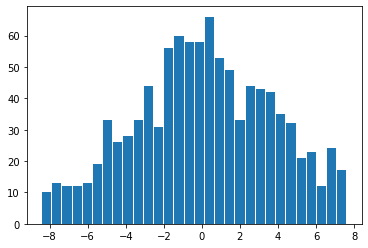

The actual slope for  Harvard University  is  8.007142857142856


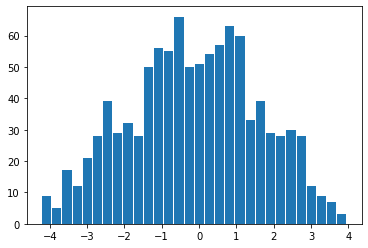

The actual slope for  Yale University  is  3.1714285714285717


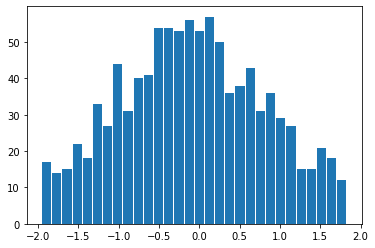

The actual slope for  Columbia University  is  -0.6785714285714288


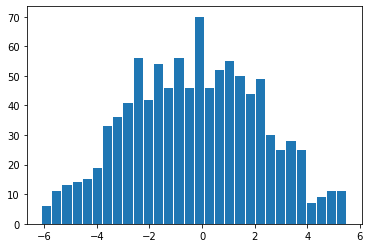

The actual slope for  Stanford University  is  5.821428571428571


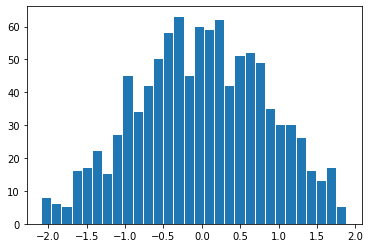

The actual slope for  University of Michigan  is  1.8000000000000003


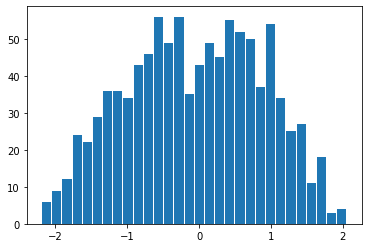

The actual slope for  Princeton University  is  1.6571428571428575


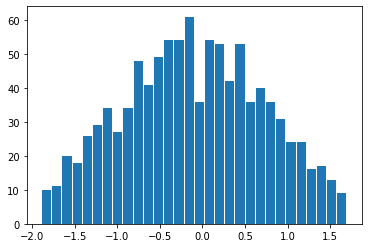

The actual slope for  University of Cambridge  is  1.5857142857142856


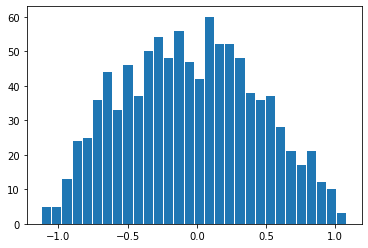

The actual slope for  New York University  is  0.49999999999999994


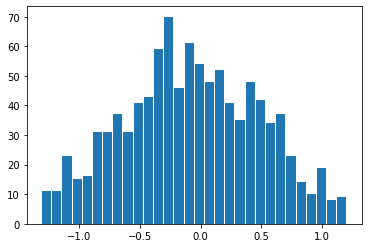

The actual slope for  University of Chicago  is  -0.6142857142857143


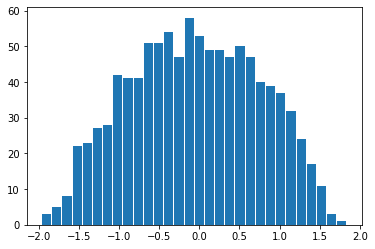

The actual slope for  Cornell University  is  1.8571428571428572


In [33]:
for i in range(10):
    pyplot.hist(school_permutation_slopes[i], bins=30, align='left', rwidth=0.9)
    pyplot.show()
    print ("The actual slope for ",top_ten[i]," is ",regression_slopes[i])

It looks like the actual slopes are at the edges of the histogram for most schools. Only the NYU slope and Columbia slope are perhaps closer to the center of the permutations slopes histogram.

What does this tell us? Well the model is reliable and these schools are really increasing in notable alumni at this rate per five years. We can trust the slopes of the regression for each school: the number of new notable alumni for each school increases by about that amount every five years.

# Conclusions

To wrap up, we have found the following:

Here is our top ten college ranking, based off counts of alumni pages on wikipedia.

In [34]:
top_ten

['Harvard University',
 'Yale University',
 'Columbia University',
 'Stanford University',
 'University of Michigan',
 'Princeton University',
 'University of Cambridge',
 'New York University',
 'University of Chicago',
 'Cornell University']

Our model determining rates of increase for each school is pretty strong. <br>
Most of the schools are on the way up, especially `Harvard`. The only schools decreasing in their output of new famous people are `Columbia` and `UChicago`.

**Where is our model weak?** <br><br>
> Well as mentioned before, the nature of what we are measuring might give some advantage to certain occupations – being in the theatre/television business is more likely to land you a wikipedia page. Still, I think it is a fair measure of the overall success of a given school. <br>
Also, our list is rather similar to the aggregate list created at the beginning of this notebook. That tells me there really is a correlation between being the 'best school' and have the most notable alumni.<br><br>
One other weakness in our model is the disorganization of information on wikipedia. Because of this disorganization I was unable to use *occupation* data effectively, something that would have been really interesting to see. On top of that, we may have missed a bunch of hits for some schools if their name was inputted differently. For instance, there are 9 hits for *Cornell* in the data set. Is this Cornell University? It is hard to tell.<br><br>
For the most part, I do not think these mislabelings have impacted the data set much given how large the data set is (9 more hits for *Cornell University* wasn't going to bring us above UChicago). But one school it may have significantly affected is Oxford University– oftentimes alumni of Oxford list their college within Oxford as their alma mater rather than Oxford itself. Perhaps if the data was more organized Oxford would have made it into the top ten list. <br><br>
However, then Cornell would have been bumped off so maybe this disorganized data isn't all bad.

**Where is our model strong?** <br><br>
> Well, we identified pretty conclusively that Harvard is by far the strongest college in terms of notable alumni. I think this data certainly corroborates the lists we downloaded at the beginning of this notebook that place Harvard at the top of tertiary education institutions.<br><br>
I also think that getting UMichigan and NYU on our list is pretty significant – while they are often considered good schools they are rarely ranked in the very top ten. Is that something that might change? Certainly we have shown that these two schools have had their fair share of success. And the rate of increase for both schools seems to be on par with the Ivies around them.

**Finally, what is the most suprisingly successful colleges?**

> The `University of Michigan` is the most suprisingly successful college. It only ranks below four other schools, and if we also consider our evaluation of whether these colleges are on the rise or fall,  it looks like it will surpass `Columbia` at some point. Only `Harvard`, `Yale`, and `Stanford` are definitively above it. I think this is a pretty significant finding!

# Source Code

All of my source code can be found in my github. The `ReadMe` provides an order to the documents.

> https://github.coecis.cornell.edu/qjt3/data-project

# Acknowledgements

Thank you to...
> Wikipedia, for creating the greatest open-edit and free-access encylopedia.

> David Mimno, for helping us all out both with our projects and the crazy shift we are living through.

> My dad, for kindly pointing out all the parentheses I miss after I rage about the house for an hour.

# Works Cited
    wikipedia entry on wikipedia:
        wikipedia.org/wiki/Wikipedia
    wikipedia data dump:
        https://dumps.wikimedia.org/backup-index.html
    online top college lists:
        https://www.usnews.com/best-colleges/rankings/national-universities
        https://www.forbes.com/top-colleges/#640482791987
        https://www.timeshighereducation.com/rankings/unitedstates/2019#!/page/0/
            length/25/sort_by/rank/sort_order/asc/cols/stats